1-2. Загрузка данных

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [18]:
file_path = 'data_example.csv'
data = pd.read_csv(file_path,
                   sep=",",
                   header=[0,1,2,3],
                   skiprows=1,
                   na_values=['Missing','nan','Offln'],
                   encoding_errors='ignore'
                  )
data

,Name,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
,Units,Unnamed: 1_level_1,degc,degc,degc,Unnamed: 5_level_1,degc,degc,Unnamed: 8_level_1,degc,...,Unnamed: 86_level_1,Unnamed: 87_level_1,Unnamed: 88_level_1,Bar,%,%,%,Bar,degc,Bar
,Digital,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,Sample Rate,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,...,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин
0,00:00:00 01/03/2021,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,...,1.0,1.0,3.0,0.60,38.0,0.0,0.0,8.68,-8.22,14.77
1,00:02:00 01/03/2021,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,...,1.0,3.0,3.0,0.60,59.0,0.0,0.0,8.59,-8.22,14.77
2,00:04:00 01/03/2021,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,...,3.0,3.0,3.0,0.60,81.0,0.0,0.0,10.76,-8.22,14.77
3,00:06:00 01/03/2021,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,...,2.0,1.0,3.0,0.60,38.0,0.0,0.0,7.69,-6.00,14.77
4,00:08:00 01/03/2021,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,...,3.0,1.0,3.0,0.60,50.0,0.0,0.0,10.23,-6.00,14.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,07:32:00 06/04/2021,0.0,-15.11,8.11,8.22,0.0,-0.61,2.28,11.0,1.22,...,1.0,1.0,3.0,2.97,19.0,0.0,0.0,10.62,5.78,14.77


3. Очистка заголовков

In [19]:
data.columns[:4]

MultiIndex([(                                 'Name', ...),
            ('10CT G PBP -1/+1:   --- EKC состояние', ...),
            (      '10CT G PBP -1/+1:   u09 S5 Темп', ...),
            (    '11CT G OVZ +5/+8:   u69 Sair Темп', ...)],
           )

In [20]:
data.columns = data.columns.droplevel([1,2,3])
data.columns[:4]


Index(['Name', '10CT G PBP -1/+1:   --- EKC состояние',
       '10CT G PBP -1/+1:   u09 S5 Темп', '11CT G OVZ +5/+8:   u69 Sair Темп'],
      dtype='object')

In [21]:
data = data.rename(columns={'Name':'time'})
data.head(5)

,time,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
0,00:00:00 01/03/2021,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,...,1.0,1.0,3.0,0.6,38.0,0.0,0.0,8.68,-8.22,14.77
1,00:02:00 01/03/2021,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,...,1.0,3.0,3.0,0.6,59.0,0.0,0.0,8.59,-8.22,14.77
2,00:04:00 01/03/2021,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,...,3.0,3.0,3.0,0.6,81.0,0.0,0.0,10.76,-8.22,14.77
3,00:06:00 01/03/2021,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,...,2.0,1.0,3.0,0.6,38.0,0.0,0.0,7.69,-6.00,14.77
4,00:08:00 01/03/2021,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,...,3.0,1.0,3.0,0.6,50.0,0.0,0.0,10.23,-6.00,14.77


4. Информация о датасете

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26151 entries, 0 to 26150
Data columns (total 96 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   time                                     26151 non-null  object 
 1   10CT G PBP -1/+1:   --- EKC состояние    26145 non-null  float64
 2   10CT G PBP -1/+1:   u09 S5 Темп          26145 non-null  float64
 3   11CT G OVZ +5/+8:   u69 Sair Темп        26143 non-null  float64
 4   11CT G OVZ +5/+8:   u09 S5 Темп          26143 non-null  float64
 5   11CT G OVZ +5/+8:   --- EKC состояние    26143 non-null  float64
 6   12CT G GSR +2/+4:   u09 S5 Темп          26143 non-null  float64
 7   12CT G GSR +2/+4:   u69 Sair Темп        26143 non-null  float64
 8   12CT G GSR +2/+4:   --- EKC состояние    26143 non-null  float64
 9   13CT G PBP -1/+1:   u69 Sair Темп        26143 non-null  float64
 10  13CT G PBP -1/+1:   --- EKC состояние    26143

5. Работа с индексом времени



In [23]:
data['time'] = pd.to_datetime(data['time'], format=' %H:%M:%S %d/%m/%Y')
data.index = data.pop('time')
data = data.sort_index()
data

,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,13CT G PBP -1/+1: --- EKC состояние,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
time,,,,,,,,,,,,,,,,,,,,,
2021-03-01 00:00:00,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,0.0,...,1.0,1.0,3.0,0.60,38.0,0.0,0.0,8.68,-8.22,14.77
2021-03-01 00:02:00,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,11.0,...,1.0,3.0,3.0,0.60,59.0,0.0,0.0,8.59,-8.22,14.77
2021-03-01 00:04:00,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,11.0,...,3.0,3.0,3.0,0.60,81.0,0.0,0.0,10.76,-8.22,14.77
2021-03-01 00:06:00,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,11.0,...,2.0,1.0,3.0,0.60,38.0,0.0,0.0,7.69,-6.00,14.77
2021-03-01 00:08:00,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,11.0,...,3.0,1.0,3.0,0.60,50.0,0.0,0.0,10.23,-6.00,14.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:32:00,0.0,-15.11,8.11,8.22,0.0,-0.61,2.28,11.0,1.22,11.0,...,1.0,1.0,3.0,2.97,19.0,0.0,0.0,10.62,5.78,14.77
2021-04-06 07:34:00,11.0,-16.28,7.22,-1.39,0.0,1.00,3.78,11.0,2.28,0.0,...,1.0,1.0,3.0,2.97,29.0,0.0,0.0,11.10,5.78,14.77
2021-04-06 07:36:00,11.0,-1.39,5.78,-4.89,11.0,-3.50,3.00,0.0,1.39,0.0,...,3.0,1.0,3.0,2.97,38.0,0.0,0.0,11.23,5.78,14.77


6. Пропущенные значения

10CT G PBP -1/+1:   --- EKC состояние    6
10CT G PBP -1/+1:   u09 S5 Темп          6
11CT G OVZ +5/+8:   u69 Sair Темп        8
11CT G OVZ +5/+8:   u09 S5 Темп          8
11CT G OVZ +5/+8:   --- EKC состояние    8
                                        ..
111CT AG:   Cond Requested Cap           6
111CT AG:   Cond Running Cap             6
111CT AG:   Cond Ctrl Pressure           6
111CT AG:   Sc3 Датч нар воздуха         0
111CT AG:   Cond Reference               6
Length: 95, dtype: int64


<Axes: >

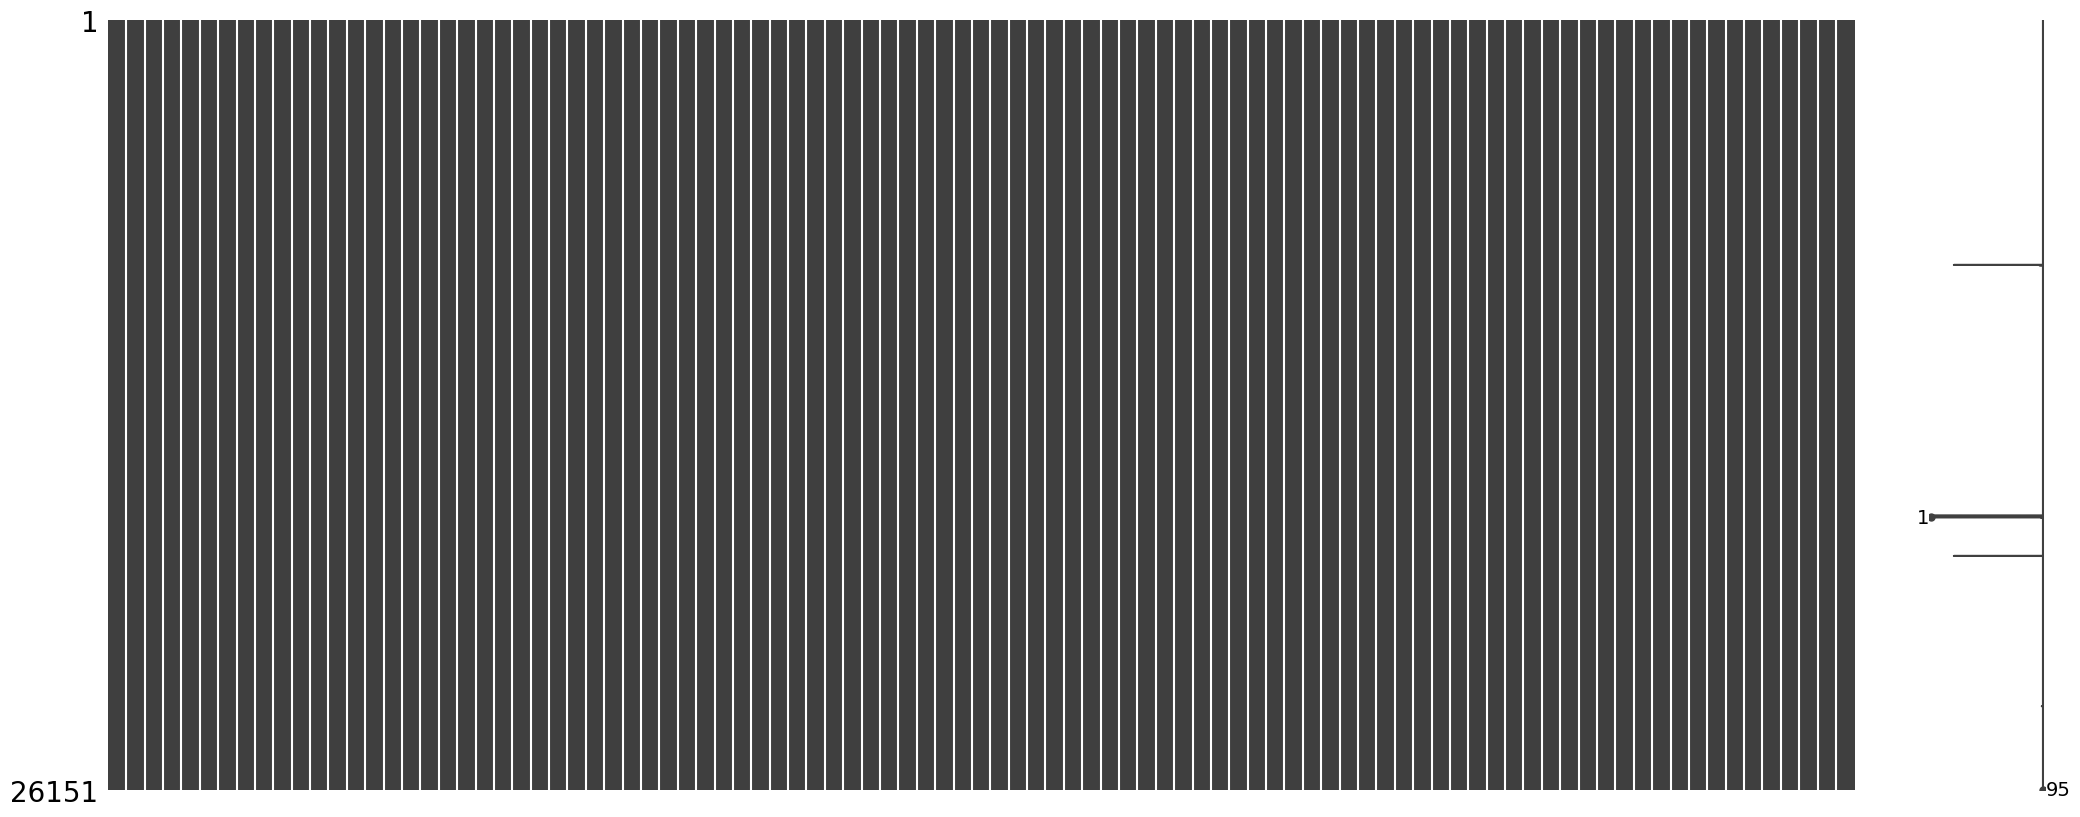

In [30]:
print(data.isna().sum())
msno.matrix(data)

In [31]:
data[data.isna().sum(axis=1) > 0]

,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,13CT G PBP -1/+1: --- EKC состояние,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
time,,,,,,,,,,,,,,,,,,,,,
2021-03-12 13:16:00,0.0,6.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.60,0.0,0.0,0.0,9.20,-2.89,14.77
2021-03-12 13:42:00,11.0,4.00,8.50,2.50,0.0,-1.11,10.00,0.0,7.72,0.0,...,1.0,1.0,2.0,0.60,0.0,0.0,0.0,4.80,-5.00,14.77
2021-03-24 09:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.89,NaN
2021-03-24 09:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.89,NaN
2021-03-24 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN
2021-03-24 09:32:00,0.0,-7.28,4.61,-5.11,11.0,-1.61,1.50,11.0,-0.72,11.0,...,1.0,1.0,3.0,1.18,19.0,0.0,0.0,11.79,0.78,14.77
2021-03-24 10:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.72,NaN
2021-03-24 10:12:00,11.0,-1.72,7.78,7.72,11.0,-8.89,1.22,11.0,0.11,0.0,...,1.0,2.0,3.0,2.97,50.0,0.0,0.0,13.21,0.72,14.77
2021-03-24 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.39,NaN


In [32]:
data = data.dropna(subset=data.columns.drop('111CT AG:   Sc3 Датч нар воздуха'), how='all', axis=0)

In [33]:
data.isna().sum().values

array([0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [34]:
data = data.fillna(method='ffill')

/tmp/ipykernel_10103/917065080.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [35]:
data.isna().sum().sum()

np.int64(0)

7. Типы данных

In [36]:
col_int = [col for col in data.columns if col.find('---')>-1 or col.find('Cap')>-1]
col_int

['10CT G PBP -1/+1:   --- EKC состояние',
 '11CT G OVZ +5/+8:   --- EKC состояние',
 '12CT G GSR +2/+4:   --- EKC состояние',
 '13CT G PBP -1/+1:   --- EKC состояние',
 '14HT SH IKRA -4/-8:   --- EKC состояние',
 '15CT G MSO -1/+1:   --- EKC состояние',
 '16CT G MSO -1/+1:   --- EKC состояние',
 '17CT G GSR +2/+4:   --- EKC состояние',
 '18CT G PTO -1/+1:   --- EKC состояние',
 '19CT G GSR +2/+4:   --- EKC состояние',
 '20CT G GSR +2/+4:   --- EKC состояние',
 '21CT G GSR +2/+4:   --- EKC состояние',
 '22CT G GSR +2/+4:   --- EKC состояние',
 '23CT V MSO -1/+1:   --- EKC состояние',
 '24CT V GSR +2/+4:   --- EKC состояние',
 '25CT V GSR +2/+4:   --- EKC состояние',
 '26CT G MLK +2/+4:   --- EKC состояние',
 '27CT G MLK +2/+4:   --- EKC состояние',
 '28CT G MLK +2/+4:   --- EKC состояние',
 '29CT G MLK +2/+4:   --- EKC состояние',
 '30CT G GSR +2/+4:   --- EKC состояние',
 '34CT G TRT +2/+4:   --- EKC состояние',
 '52CT K PTO -1/+1:   --- EKC состояние',
 '53K VOP POD PTO:   --- EKC сос

In [37]:
data[col_int] = data[col_int].astype(int)
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26145 entries, 2021-03-01 00:00:00 to 2021-04-06 07:40:00
Data columns (total 95 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   10CT G PBP -1/+1:   --- EKC состояние    26145 non-null  int64  
 1   10CT G PBP -1/+1:   u09 S5 Темп          26145 non-null  float64
 2   11CT G OVZ +5/+8:   u69 Sair Темп        26145 non-null  float64
 3   11CT G OVZ +5/+8:   u09 S5 Темп          26145 non-null  float64
 4   11CT G OVZ +5/+8:   --- EKC состояние    26145 non-null  int64  
 5   12CT G GSR +2/+4:   u09 S5 Темп          26145 non-null  float64
 6   12CT G GSR +2/+4:   u69 Sair Темп        26145 non-null  float64
 7   12CT G GSR +2/+4:   --- EKC состояние    26145 non-null  int64  
 8   13CT G PBP -1/+1:   u69 Sair Темп        26145 non-null  float64
 9   13CT G PBP -1/+1:   --- EKC состояние    26145 non-null  int64  
 10  13CT G PBP 

In [38]:
col_cat = [col for col in data.columns if col.find('---')>-1]
data[col_cat] = data[col_cat].astype('category')
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26145 entries, 2021-03-01 00:00:00 to 2021-04-06 07:40:00
Data columns (total 95 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   10CT G PBP -1/+1:   --- EKC состояние    26145 non-null  category
 1   10CT G PBP -1/+1:   u09 S5 Темп          26145 non-null  float64 
 2   11CT G OVZ +5/+8:   u69 Sair Темп        26145 non-null  float64 
 3   11CT G OVZ +5/+8:   u09 S5 Темп          26145 non-null  float64 
 4   11CT G OVZ +5/+8:   --- EKC состояние    26145 non-null  category
 5   12CT G GSR +2/+4:   u09 S5 Темп          26145 non-null  float64 
 6   12CT G GSR +2/+4:   u69 Sair Темп        26145 non-null  float64 
 7   12CT G GSR +2/+4:   --- EKC состояние    26145 non-null  category
 8   13CT G PBP -1/+1:   u69 Sair Темп        26145 non-null  float64 
 9   13CT G PBP -1/+1:   --- EKC состояние    26145 non-null  category
 10 

8. Работа с непрерывными признаками

In [39]:
col_Sair = [col for col in data.columns if col.find('Sair')>-1 and 21 <= int(col[:2]) <= 30]
col_Sair

['21CT G GSR +2/+4:   u69 Sair Темп',
 '22CT G GSR +2/+4:   u69 Sair Темп',
 '23CT V MSO -1/+1:   u69 Sair Темп',
 '24CT V GSR +2/+4:   u69 Sair Темп',
 '25CT V GSR +2/+4:   u69 Sair Темп',
 '26CT G MLK +2/+4:   u69 Sair Темп',
 '27CT G MLK +2/+4:   u69 Sair Темп',
 '28CT G MLK +2/+4:   u69 Sair Темп',
 '29CT G MLK +2/+4:   u69 Sair Темп',
 '30CT G GSR +2/+4:   u69 Sair Темп']

/tmp/ipykernel_10103/756095928.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)


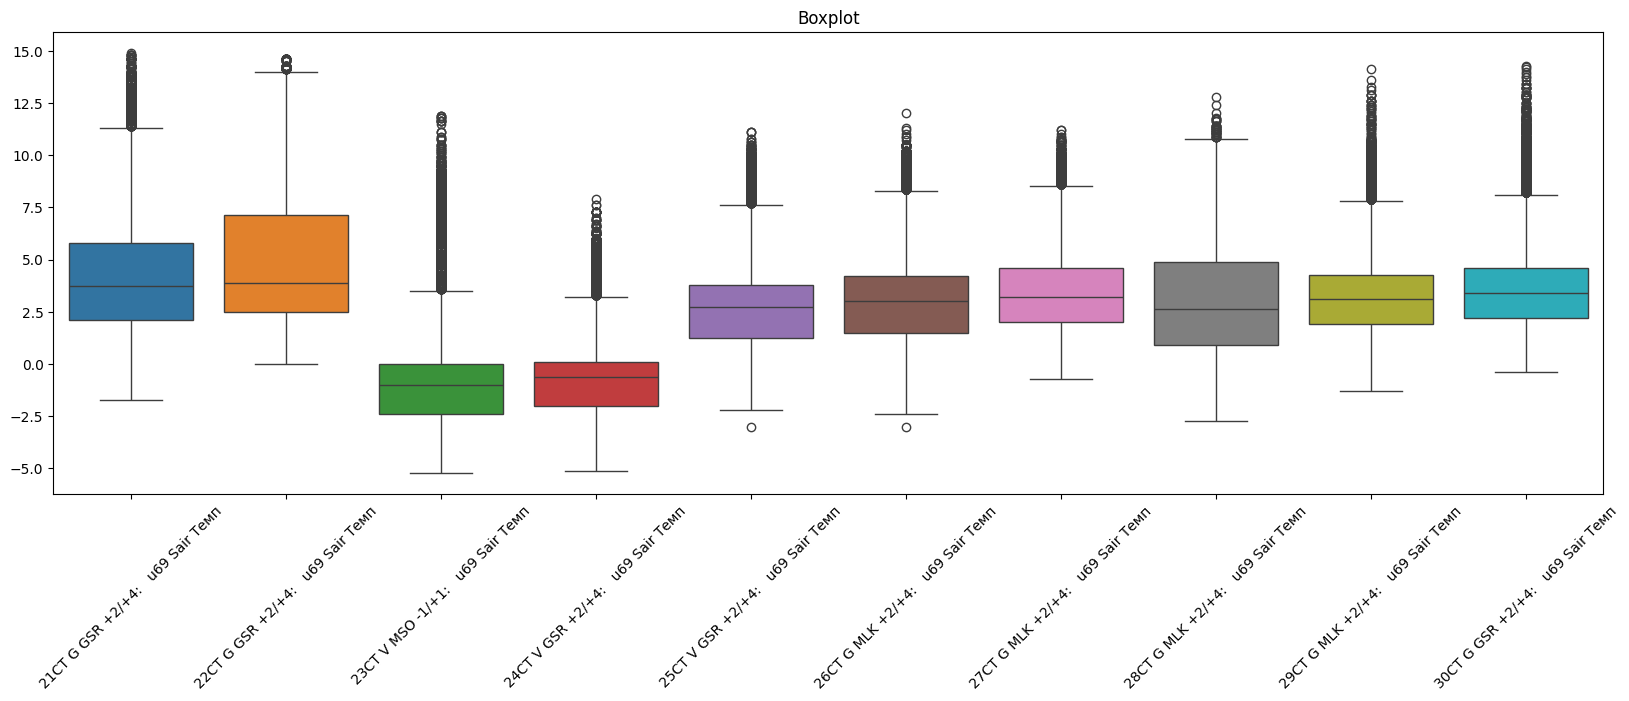

In [40]:
plt.figure(figsize=(20, 6))
boxplot = sns.boxplot(data=data[col_Sair])
boxplot.set(title='Boxplot')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
plt.show()


9. Ресэмплирование

/tmp/ipykernel_10103/3843727790.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data[col_Sair].resample('30T').median().plot(figsize=(20,5), title='Ресэмплированные значения признаков с Sair')


<Axes: title={'center': 'Ресэмплированные значения признаков с Sair'}, xlabel='time'>

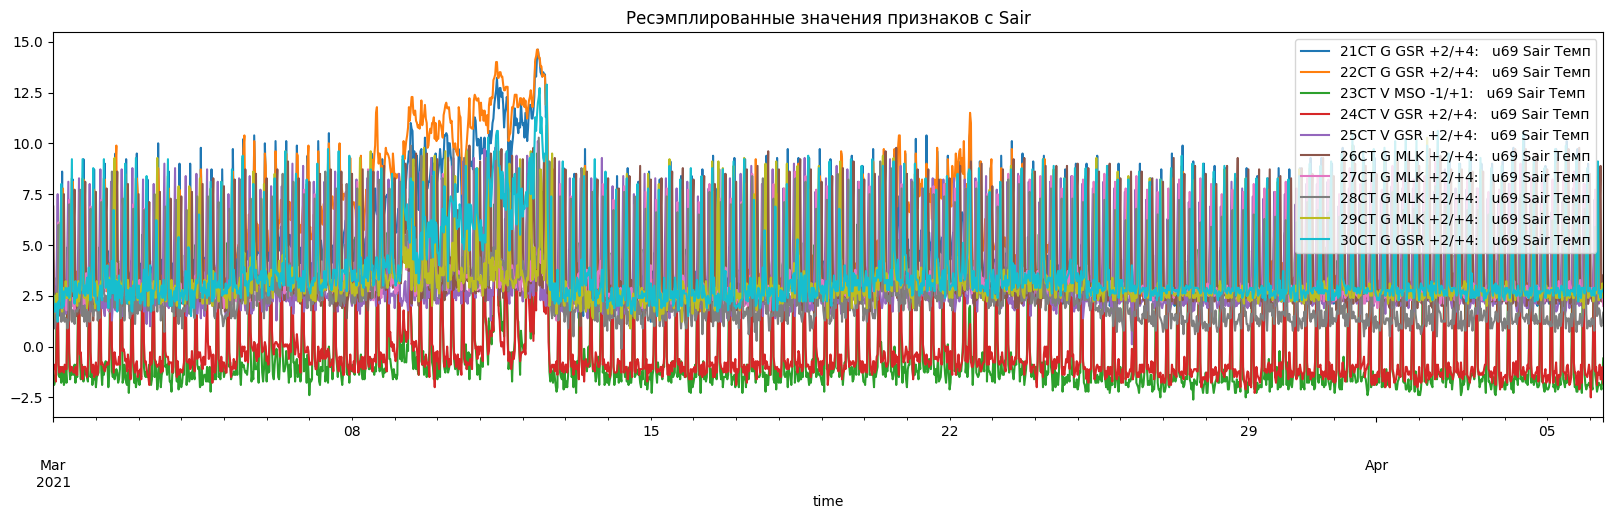

In [41]:
data[col_Sair].resample('30T').median().plot(figsize=(20,5), title='Ресэмплированные значения признаков с Sair')

10. Сглаживание

<Axes: title={'center': 'Сглаженные значения признаков с Sair'}, xlabel='time'>

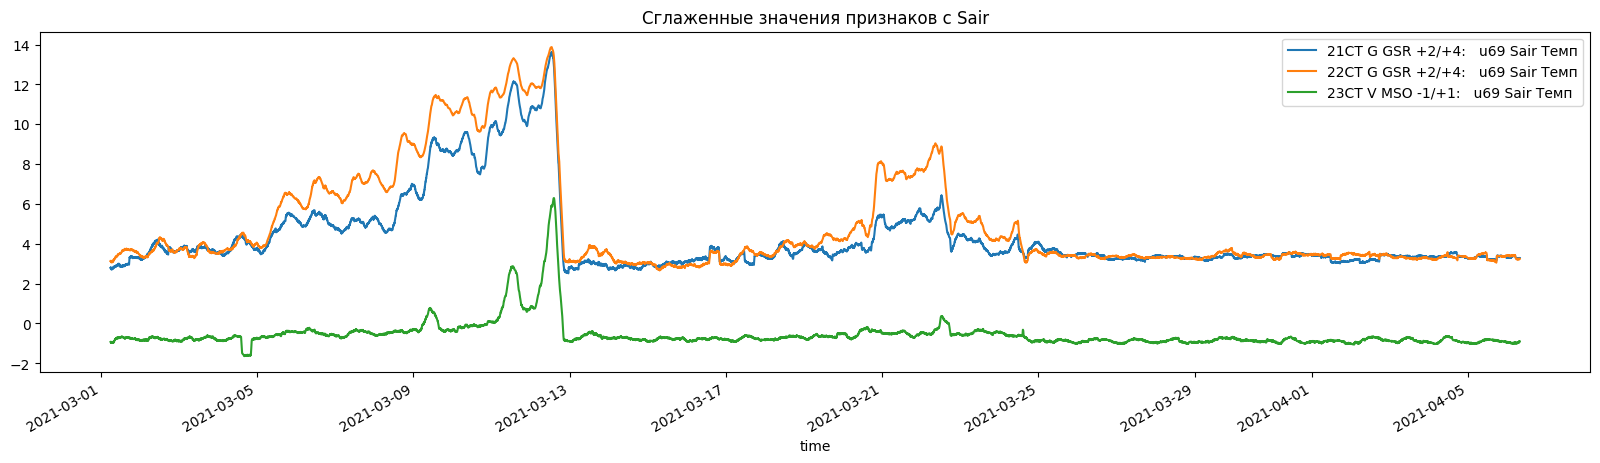

In [42]:
data[col_Sair[:3]].rolling(180).mean().plot(figsize=(20,5), title='Сглаженные значения признаков с Sair')

11. Визуализация разницы между ресэмплингом и сглаживанием

/tmp/ipykernel_10103/648131155.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data[col_Sair[0]].resample('12T').mean().loc[time_from:time_till].plot(figsize=(20,5), label='resample 12 min')


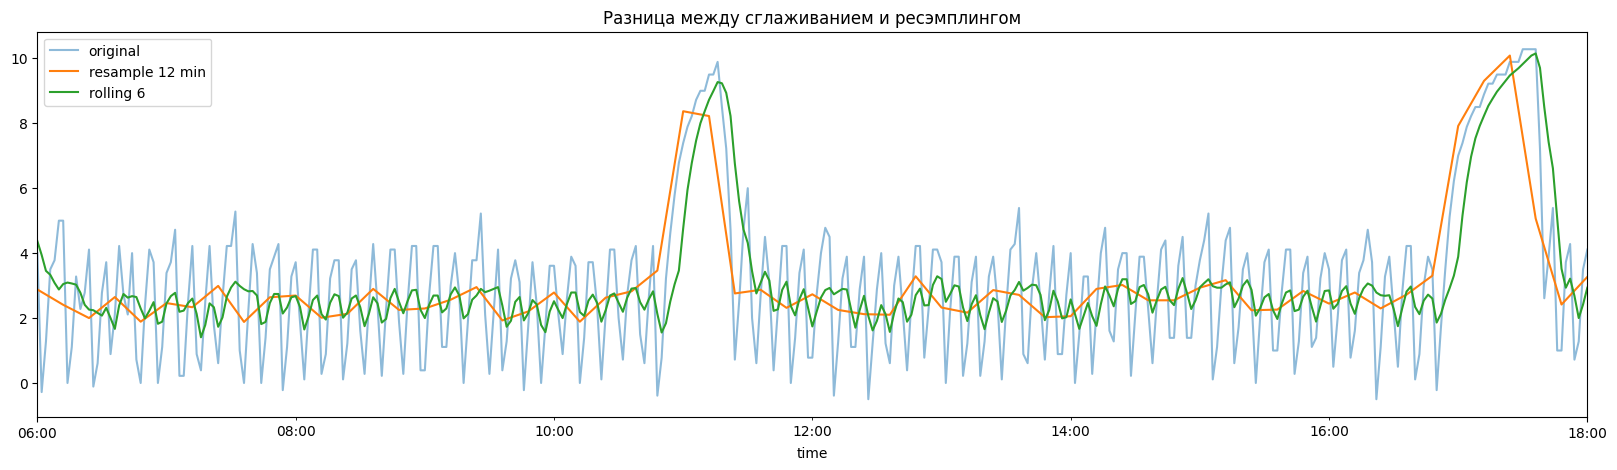

In [43]:
time_from = '2021-03-01 06:00'
time_till = '2021-03-01 18:00'

plt.title('Разница между сглаживанием и ресэмплингом')
data[col_Sair[0]].loc[time_from:time_till].plot(figsize=(20,5), label='original', alpha=0.5)
data[col_Sair[0]].resample('12T').mean().loc[time_from:time_till].plot(figsize=(20,5), label='resample 12 min')
data[col_Sair[0]].rolling(6).mean().loc[time_from:time_till].plot(figsize=(20,5), label='rolling 6')
plt.legend()
plt.show()


12. Гистограммы и столбчатые диаграммы


/tmp/ipykernel_10103/1816867402.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  EKCstate_Map = data[[col for col in data.columns if '---' in col]].applymap(lambda x: 1 if x==0 else 0)


<Axes: title={'center': 'Количество одновременно включенных горок'}>

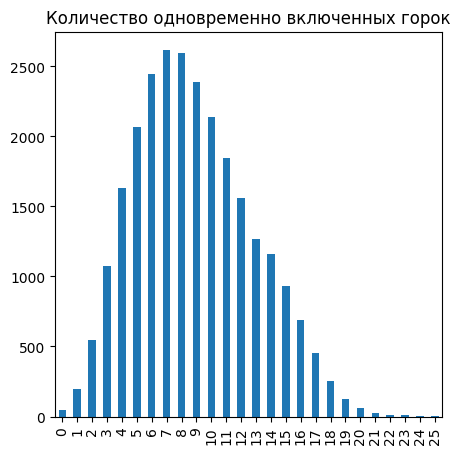

In [44]:
EKCstate_Map = data[[col for col in data.columns if '---' in col]].applymap(lambda x: 1 if x==0 else 0)
EKCstate_Map.sum(axis=1).value_counts().sort_index().plot.bar(figsize=(5,5), title = 'Количество одновременно включенных горок')

13. Subplots

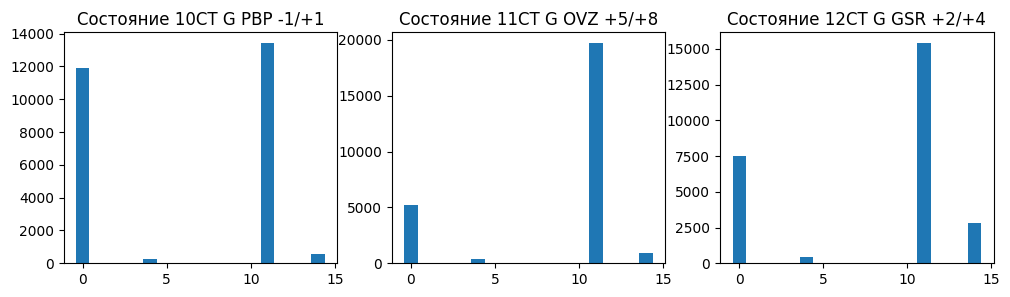

In [45]:
plt.figure(figsize=(12,3))

i = 1

for col in data.columns:
    if col.find("---")!=-1:
        plt.subplot(1, 3, i) # (кол-во строк,кол-во столбцов,ячейка
        plt.bar(x=data[col].value_counts().index, height=data[col].value_counts().values)
        plt.title(f'Состояние {col.split(":")[0]}')

        i +=1

    if i == 4: break

plt.show()

14. Матрица корреляции

Text(0.5, 1.0, 'Матрица корреляции')

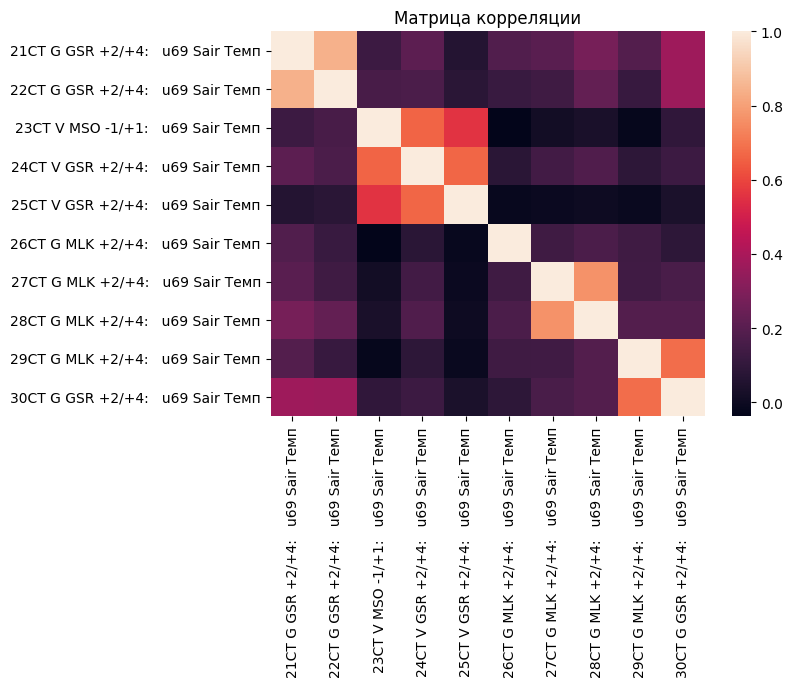

In [46]:
plt.figure(figsize=(7,5))
sns.heatmap(data[col_Sair].corr())
plt.title('Матрица корреляции')

15. Проверьте гипотезу о том, что тренд температуры u09 S5 в устройствах 12СТ и 13СТ зависит от состояния устройства. Свои выводы подтвердите визуализацией или статистиками.

In [47]:
data

,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,13CT G PBP -1/+1: --- EKC состояние,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
time,,,,,,,,,,,,,,,,,,,,,
2021-03-01 00:00:00,0,-11.39,7.50,9.11,11,-9.39,0.22,11,1.78,0,...,1.0,1.0,3.0,0.60,38,0,0,8.68,-8.22,14.77
2021-03-01 00:02:00,11,-14.78,7.78,9.11,11,-1.39,1.72,11,-0.78,11,...,1.0,3.0,3.0,0.60,59,0,0,8.59,-8.22,14.77
2021-03-01 00:04:00,11,-1.50,7.78,9.11,11,2.00,3.11,11,-1.28,11,...,3.0,3.0,3.0,0.60,81,0,0,10.76,-8.22,14.77
2021-03-01 00:06:00,11,5.22,7.00,5.22,0,3.89,4.22,0,-0.28,11,...,2.0,1.0,3.0,0.60,38,0,0,7.69,-6.00,14.77
2021-03-01 00:08:00,0,8.22,4.50,-9.28,11,-11.78,1.22,11,0.72,11,...,3.0,1.0,3.0,0.60,50,0,0,10.23,-6.00,14.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:32:00,0,-15.11,8.11,8.22,0,-0.61,2.28,11,1.22,11,...,1.0,1.0,3.0,2.97,19,0,0,10.62,5.78,14.77
2021-04-06 07:34:00,11,-16.28,7.22,-1.39,0,1.00,3.78,11,2.28,0,...,1.0,1.0,3.0,2.97,29,0,0,11.10,5.78,14.77
2021-04-06 07:36:00,11,-1.39,5.78,-4.89,11,-3.50,3.00,0,1.39,0,...,3.0,1.0,3.0,2.97,38,0,0,11.23,5.78,14.77


In [52]:
cols = ['12CT G GSR +2/+4:   u09 S5 Темп',
       '12CT G GSR +2/+4:   --- EKC состояние']

df = data[cols].copy()
df.columns = ['Temperature', 'State']
df

,Temperature,State
time,,
2021-03-01 00:00:00,-9.39,11
2021-03-01 00:02:00,-1.39,11
2021-03-01 00:04:00,2.00,11
2021-03-01 00:06:00,3.89,0
2021-03-01 00:08:00,-11.78,11
...,...,...
2021-04-06 07:32:00,-0.61,11
2021-04-06 07:34:00,1.00,11
2021-04-06 07:36:00,-3.50,0


In [53]:
cols_second = ['13CT G PBP -1/+1:   u09 S5 Темп',
       '13CT G PBP -1/+1:   --- EKC состояние']

df_second = data[cols_second].copy()
df_second.columns = ['Temperature', 'State']
df_second

,Temperature,State
time,,
2021-03-01 00:00:00,0.00,0
2021-03-01 00:02:00,-16.00,11
2021-03-01 00:04:00,-10.22,11
2021-03-01 00:06:00,-2.28,11
2021-03-01 00:08:00,1.61,11
...,...,...
2021-04-06 07:32:00,1.11,11
2021-04-06 07:34:00,1.89,0
2021-04-06 07:36:00,-6.00,0


In [54]:
states = df['State'].value_counts()
states

State
11    15389
0      7532
14     2800
4       424
Name: count, dtype: int64

In [55]:
states_second = df_second['State'].value_counts()
states_second

State
11    12637
0      9816
14     3374
4       317
1         1
Name: count, dtype: int64

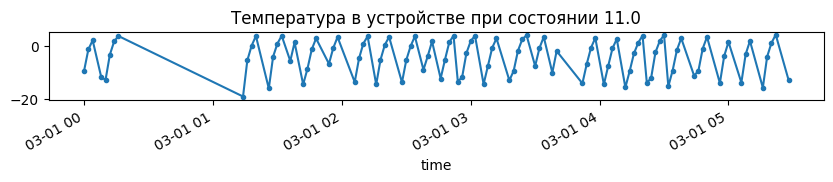

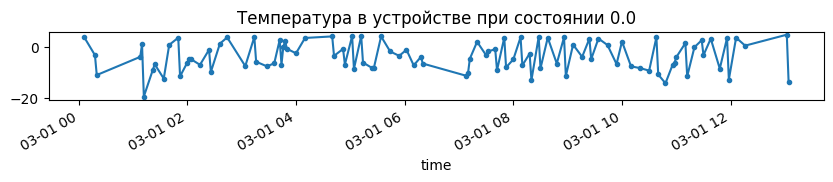

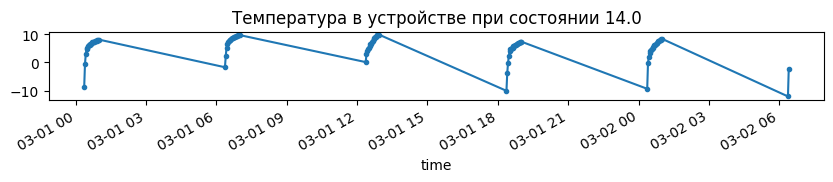

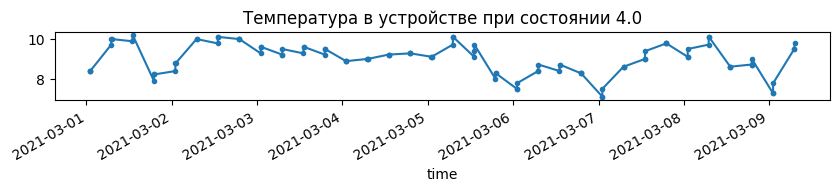

In [56]:
for state in [11.0, 0.0, 14.0, 4.0]:
    (
        df[df['State']==state]
        ['Temperature'][:100]
        .plot(figsize=(10,1), marker='.')
    )
    plt.title(f"Температура в устройстве при состоянии {state}")
    plt.show()


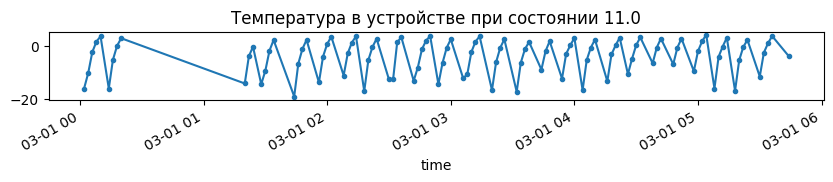

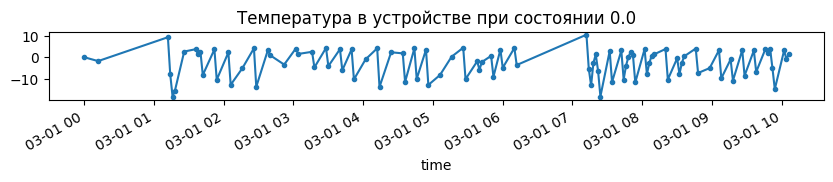

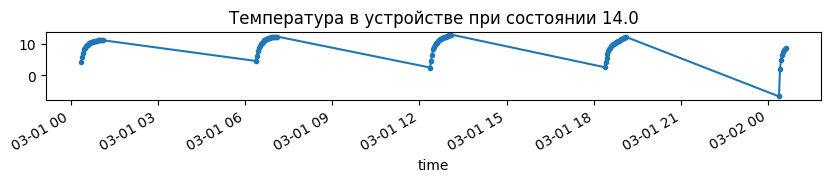

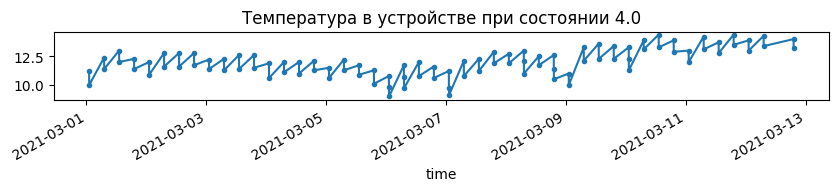

In [57]:
for state_second in [11.0, 0.0, 14.0, 4.0]:
    (
        df_second[df_second['State']==state_second]
        ['Temperature'][:100]
        .plot(figsize=(10,1), marker='.')
    )
    plt.title(f"Температура в устройстве при состоянии {state_second}")
    plt.show()


In [58]:
df = df.reset_index()

In [59]:
df_second = df_second.reset_index()

In [60]:
df_stats = pd.DataFrame(columns = states.index)
t_delta = pd.Timedelta('2T')


for state in states.index:
    df1 = df[df['State']==state].copy()
    df1['index_diff'] = df1['time'].diff()
    df1['temp_diff'] = df1['Temperature'].diff()
    df_stats[state] = df1[df1['index_diff']==t_delta]['temp_diff'].describe()

df_stats

/tmp/ipykernel_10103/1312445962.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  t_delta = pd.Timedelta('2T')


State,11,0,14,4
count,10665.000000,2757.000000,2653.000000,278.000000
mean,5.317957,-5.412590,0.681485,0.130396
std,4.672913,5.779886,1.412269,0.170881
min,-28.670000,-25.170000,-3.500000,0.000000
25%,2.390000,-9.610000,0.000000,0.000000
50%,5.170000,-6.000000,0.330000,0.000000
75%,8.220000,-1.000000,0.500000,0.280000
max,25.220000,15.500000,15.390000,0.500000


In [61]:
df_stats_second = pd.DataFrame(columns = states_second.index)
t_delta_second = pd.Timedelta('2T')


for state_second in states_second.index:
    df2 = df_second[df_second['State']==state_second].copy()
    df2['index_diff'] = df2['time'].diff()
    df2['temp_diff'] = df2['Temperature'].diff()
    df_stats_second[state_second] = df2[df2['index_diff']==t_delta_second]['temp_diff'].describe()

df_stats_second

/tmp/ipykernel_10103/1182772644.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  t_delta_second = pd.Timedelta('2T')


State,11,0,14,4,1
count,9202.000000,6321.000000,3227.000000,172.000000,0.0
mean,4.788752,-4.340456,0.695169,-0.995872,NaN
std,3.420878,6.337415,1.308247,0.216468,NaN
min,-16.000000,-23.890000,-1.110000,-1.890000,NaN
25%,2.170000,-9.500000,0.000000,-1.110000,NaN
50%,3.560000,-3.280000,0.330000,-1.000000,NaN
75%,6.890000,0.000000,0.500000,-0.890000,NaN
max,20.610000,18.610000,15.330000,0.000000,NaN


16. Прогнозирование временных рядов.